In [174]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import time
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import optuna

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#To show all rows in output
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('dataset/dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Part-1. Exploratory Data Analysis:

1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

2. Determine the number of samples present in the data, unique elements in all the features. 

3. Check if there is any null value in any features. 

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

Very clean dataset:
- No missing data
- All data are integers
- 32 features
- 11055 samples

## 1.1. Density PLot:

Density plots are particularly useful for understanding the shape and characteristics of continuous variables and can provide insights into the distribution, central tendency, spread, skewness, outliers, and overlapping distributions. 
They serve as a valuable tool for exploratory data analysis and visualization.

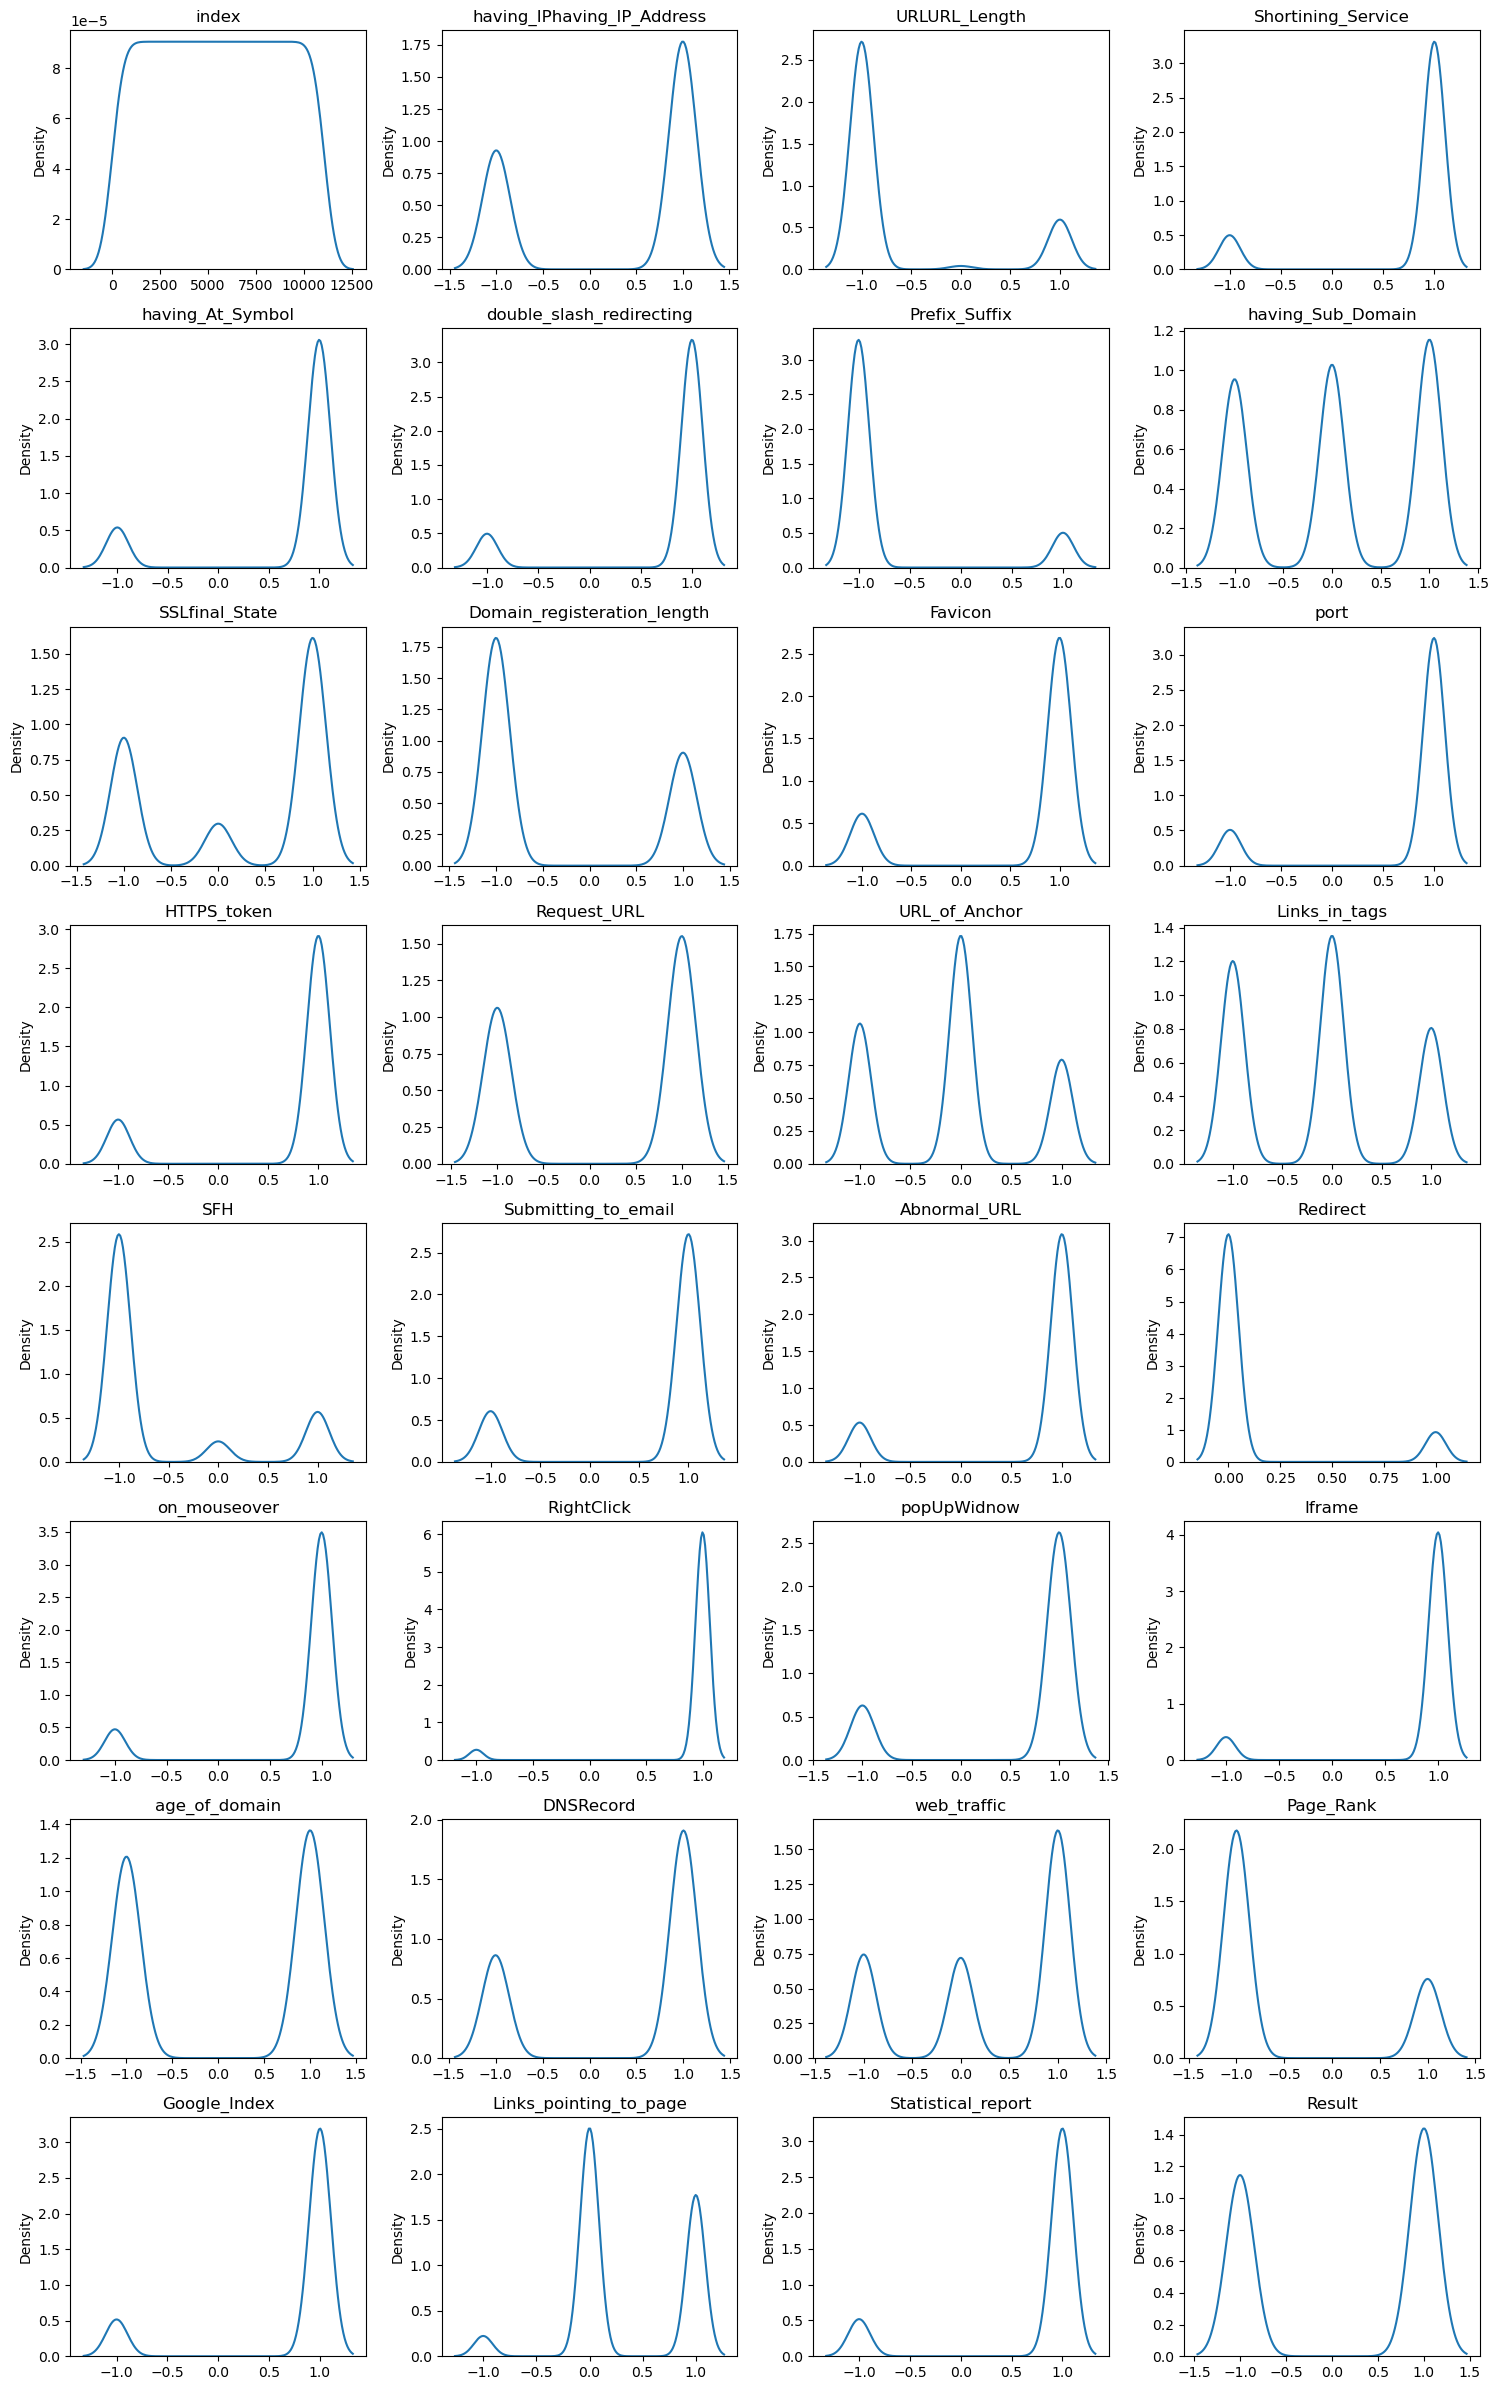

In [38]:
# Density Plot:

features = df.columns.to_list()

columns = features
n_cols = 4
n_rows = 8
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.kdeplot(
        df[column], 
        ax=ax[i]
    )
    
   
    # titles
    ax[i].set_title(f'{column}');
    ax[i].set_xlabel(None)
    
plt.tight_layout()


- The majority of variables exhibit multiple peaks (2 or 3) in their distributions.
- 

## 1.2. Hierarchically-Clustered Heatmap:

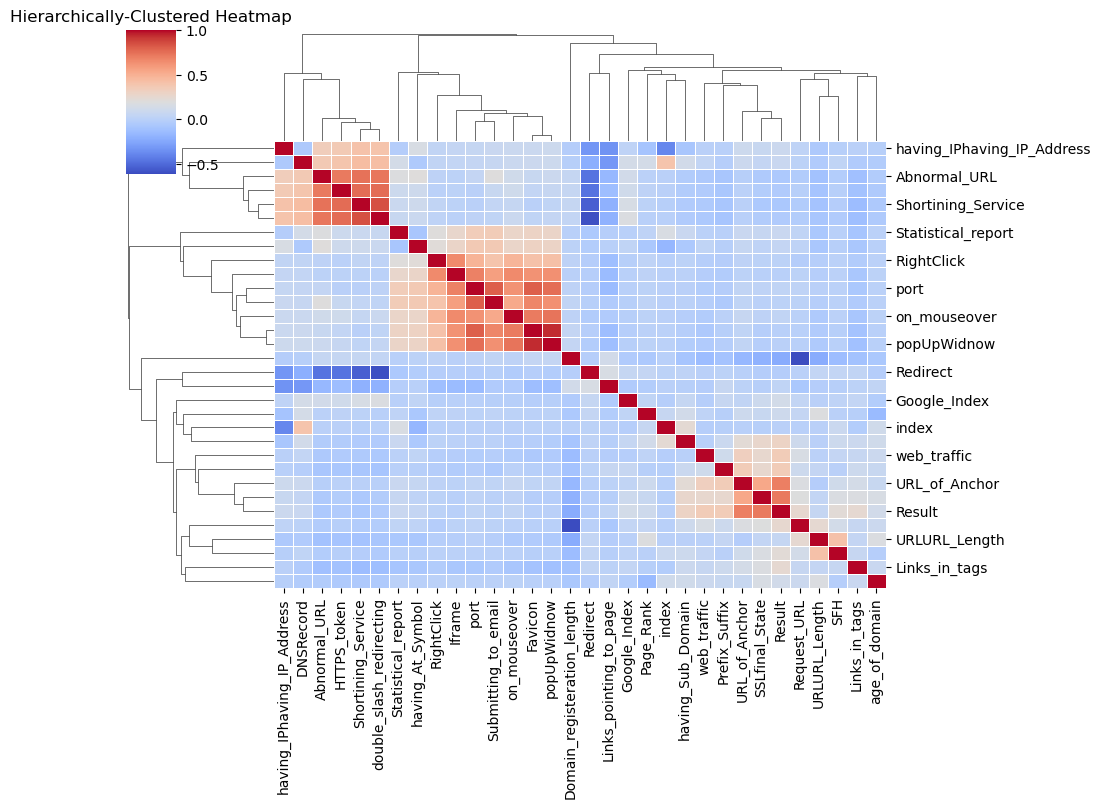

In [24]:
# Subset the data with the selected variables
subset_data = df[columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create the hierarchically-clustered heatmap
sns.clustermap(correlation_matrix, cmap='coolwarm', linewidths=0.5, figsize=(10, 8))

# Set the plot title
plt.title('Hierarchically-Clustered Heatmap')

# Show the plot
plt.show()

## 1.3. Cardinality:

In [26]:
df.nunique().sort_values(ascending=False)

index                          11055
having_Sub_Domain                  3
Links_pointing_to_page             3
web_traffic                        3
Links_in_tags                      3
URL_of_Anchor                      3
SSLfinal_State                     3
SFH                                3
URLURL_Length                      3
Prefix_Suffix                      2
Domain_registeration_length        2
Statistical_report                 2
Google_Index                       2
Page_Rank                          2
Shortining_Service                 2
DNSRecord                          2
age_of_domain                      2
Iframe                             2
popUpWidnow                        2
RightClick                         2
on_mouseover                       2
Redirect                           2
Abnormal_URL                       2
Submitting_to_email                2
having_IPhaving_IP_Address         2
having_At_Symbol                   2
double_slash_redirecting           2
R

In [39]:
#Delete Index
columns.remove('index')
features = columns

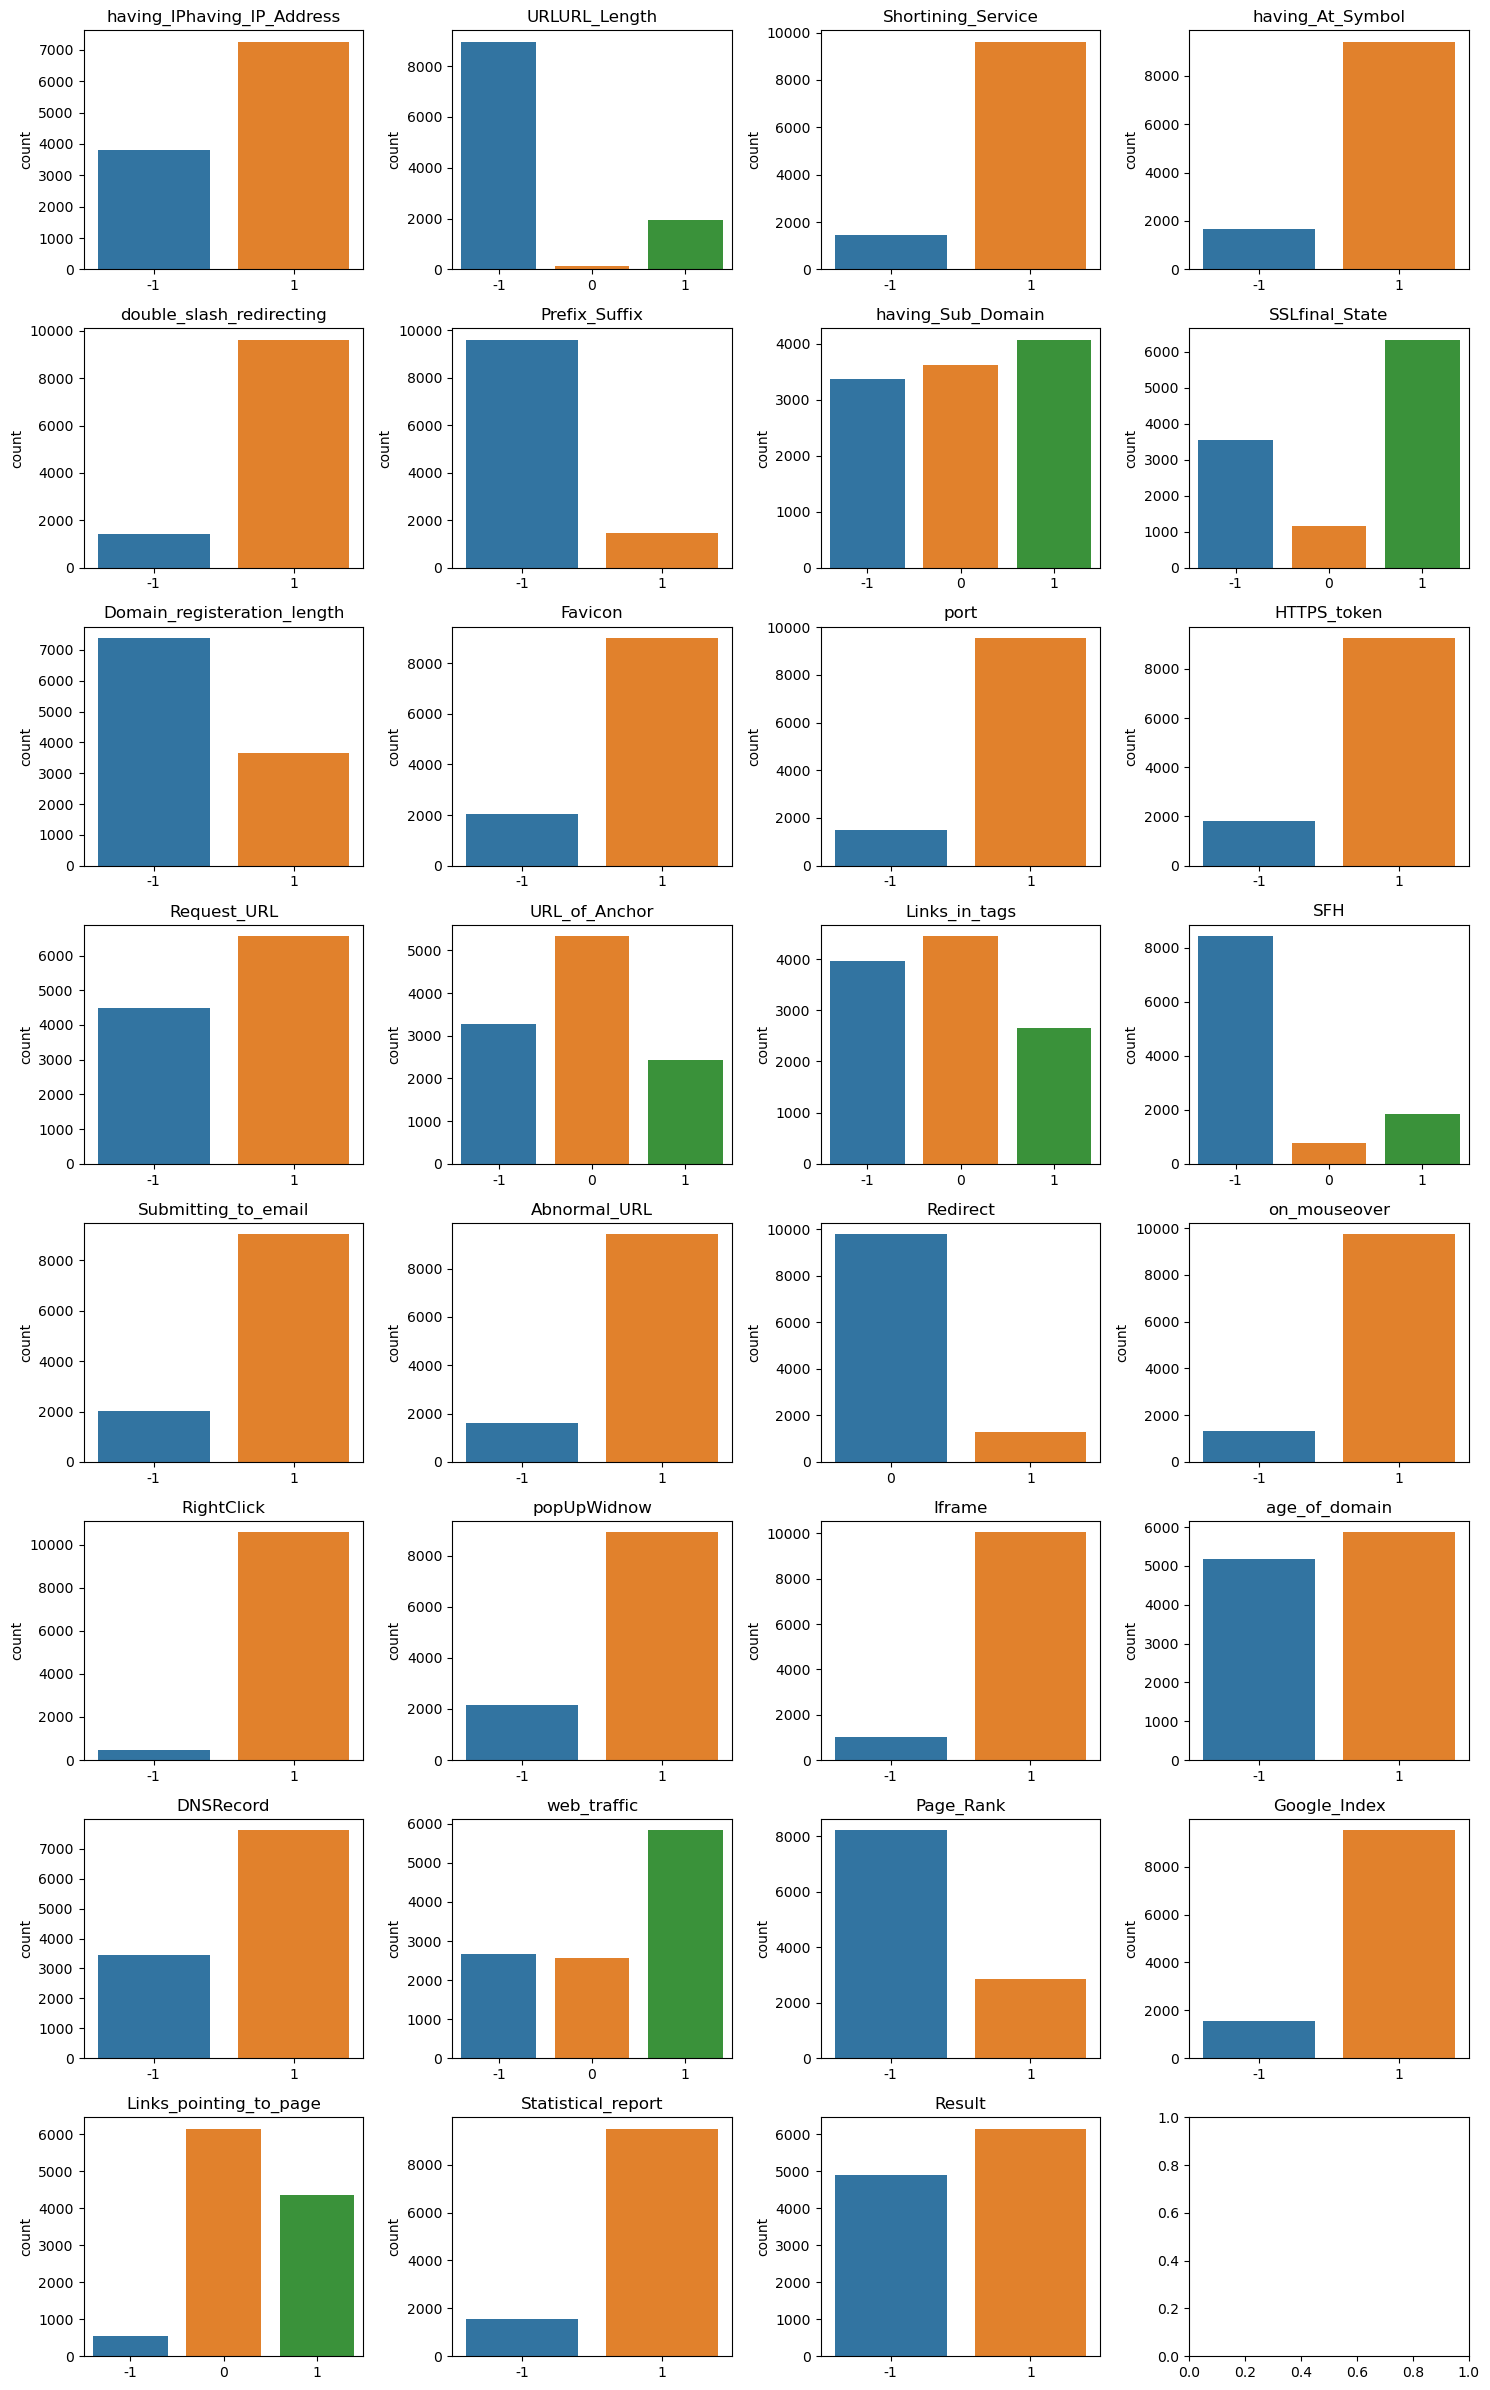

In [43]:
# Define the number of columns and rows in the subplot grid
n_cols = 4
n_rows = 8

# Create the subplot grid
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
ax = ax.flatten()

# Iterate over each feature and plot the count bar
for i, column in enumerate(features):
    # Plot the count bar using seaborn's countplot
    sns.countplot(df[column], ax=ax[i])
    
    # Set the title for the subplot
    ax[i].set_title(f'{column}')
    ax[i].set_xlabel(None)

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
df.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

# Part-2. Correlation of features and feature selection:

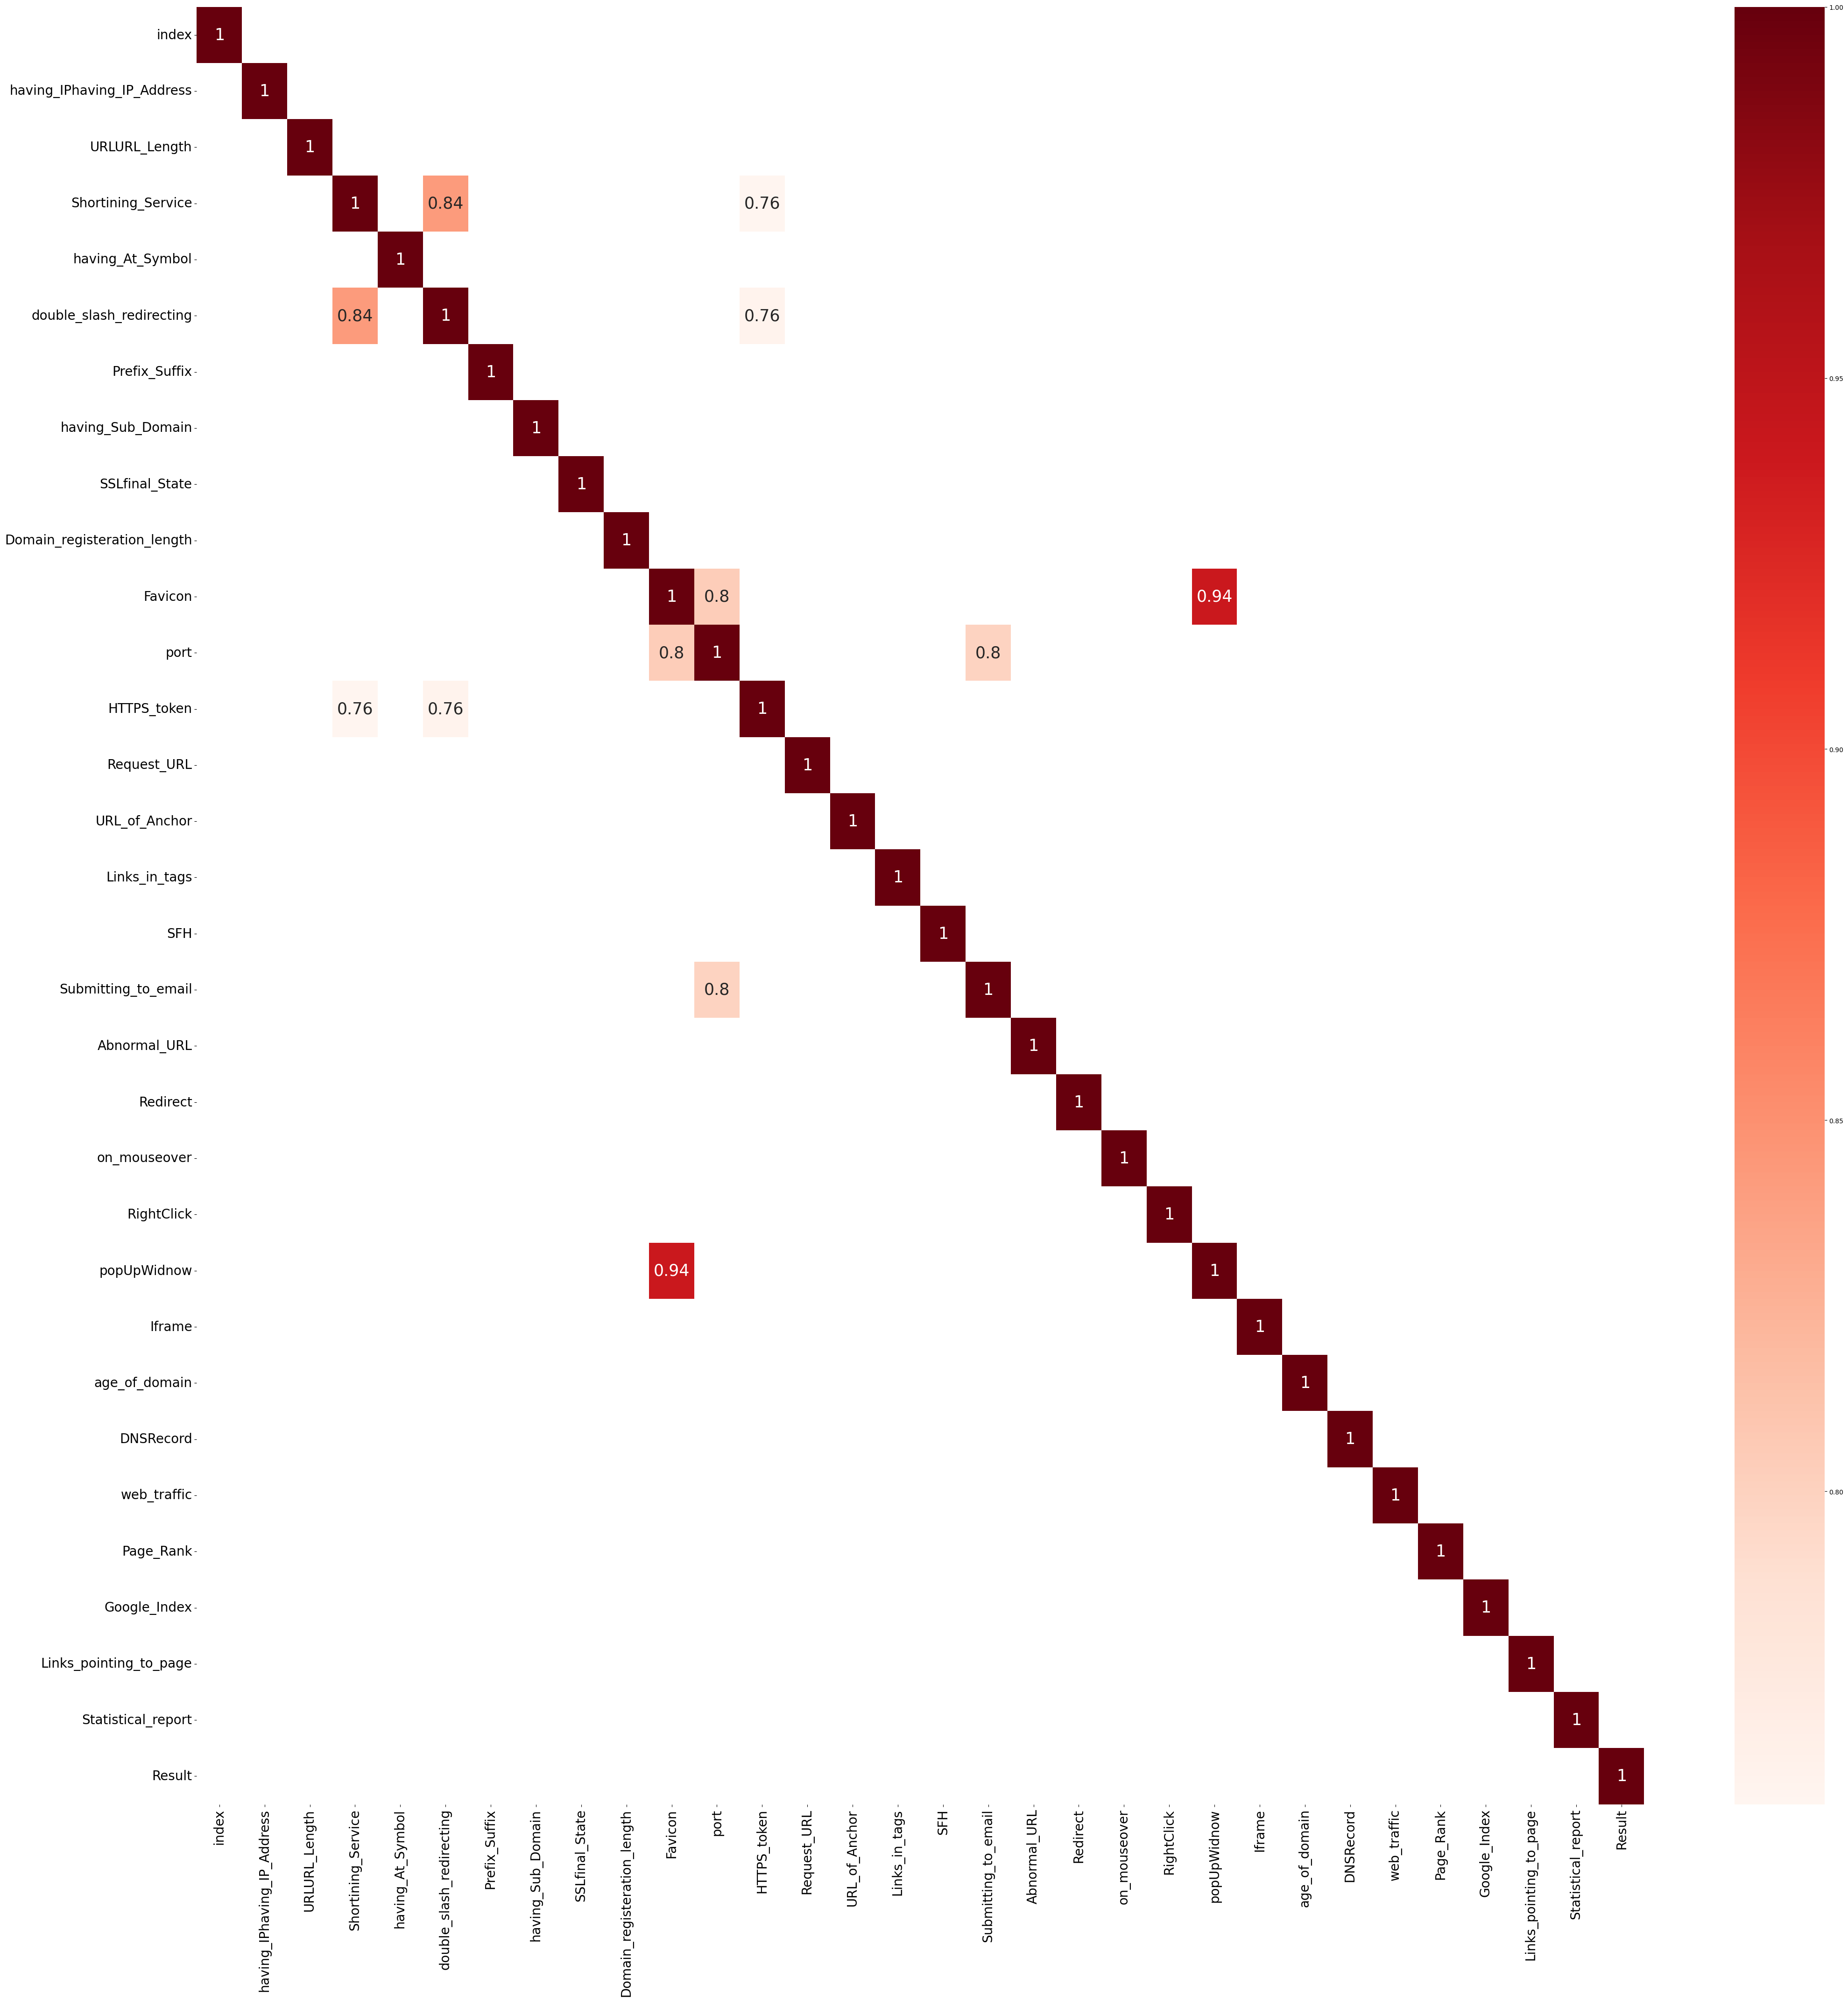

In [47]:
# Use the Heatmap to plot only correlations between <= -0.5 and >=0.5:
corr = df.corr()
#selected = corr[corr>=0.5]
selected = corr[(corr >= 0.75) | (corr <= -0.75)]
plt.figure(figsize=(50,50))
#sns.heatmap(selected, cmap="Reds", annot=True)

heatmap = sns.heatmap(selected, cmap="Reds", annot=True, annot_kws={"size": 25})

# Increase the size of x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)

# Increase the size of y-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.show()

In [48]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the threshold for correlation
threshold = 0.75

# Find the highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Add the correlated feature names to the set
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Print the highly correlated features
print("Highly correlated features:")
print(highly_correlated_features)

Highly correlated features:
{'double_slash_redirecting', 'port', 'HTTPS_token', 'popUpWidnow', 'Submitting_to_email'}


In [49]:
# Remove the highly correlated features from the DataFrame
df_filtered = df.drop(highly_correlated_features, axis=1)

# Part-3. Classification Model:

In [53]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns=['index','Result'])
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## 3.1. Comparison test (different ML Classification algorithms):

In [124]:
# Create table with models and its performance
# IMPORTANT NOTE: change metrics and algorithms as you see fit

# Define algorithms to try
algorithms = []
algorithms.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
algorithms.append(('CatBoostClassifier', CatBoostClassifier(verbose=False)))
algorithms.append(('K Nearest Neighbor', KNeighborsClassifier()))
algorithms.append(('Naive Bayes', GaussianNB()))
algorithms.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

# Set random seed
random_state = 42

# Initialize lists
names = []
train_f1 = []
test_f1 = []
train_roc = []
test_roc = []
cross_validation_scores = []
runtime = []
train_acc = []
test_acc = []

# Iterate ofer each element in algorithms
for name, clf in algorithms:
  t1 = time.time()
  names.append(name)
  clf.fit(X_train, y_train)
  train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
  test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
  train_f1.append(f1_score(y_train, clf.predict(X_train), average='micro'))
  test_f1.append(f1_score(y_test, clf.predict(X_test), average='micro'))
  train_roc.append(roc_auc_score(y_train, clf.predict(X_train), multi_class='ovr'))
  test_roc.append(roc_auc_score(y_test, clf.predict(X_test)))
  cross_validation_scores.append(cross_val_score(clf, np.vstack((X_train, X_test)), np.hstack((y_train, y_test))).mean())
  t2 = time.time()
  runtime.append(t2-t1)

# Create comparison dataframe
model_comparison = pd.DataFrame({'Algorithm': names,
                                 'Train Accuracy': train_acc,
                                 'Test Accuracy': test_acc,                                 
                                 'Train F1': train_f1,
                                 'Test F1': test_f1,
                                 'Train ROC': train_roc,
                                 'Test ROC': test_roc,
                                 'Cross validation score': cross_validation_scores,
                                 'Runtime': runtime,})

# Sort by Test_RMSE
model_comparison.sort_values(by=['Test F1'])

,Algorithm,Train Accuracy,Test Accuracy,Train F1,Test F1,Train ROC,Test ROC,Cross validation score,Runtime
3,Naive Bayes,0.603121,0.582090,0.603121,0.582090,0.641884,0.631873,0.599910,0.070210
0,Logistic Regression,0.928652,0.923564,0.928652,0.923564,0.926348,0.920583,0.927273,0.270317
2,K Nearest Neighbor,0.964383,0.936228,0.964383,0.936228,0.963821,0.934479,0.944279,7.517485
4,Random Forest,0.990163,0.966079,0.990163,0.966079,0.989810,0.964388,0.969426,2.734332
1,CatBoostClassifier,0.985640,0.968792,0.985640,0.968792,0.984761,0.966404,0.970963,20.424793


**According to this comparison test**:
- CatBoostClassifier exhibits the highest performance among all the listed algorithms, with the highest F1 score and ROC AUC score on both training and test sets. 
  It has a longer runtime, indicating more computational complexity. However, our dataset is not big, I will choice the CatBoostClassifier for this task.

## 3.2. CatBoostClassifier Model Tuning:

In [136]:
# To tune hyperparameters of CatBoostClassifier, OPTuna was used

def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size=0.2)

    params = {
        "iterations": trial.suggest_int('iterations', 100, 2000, 100),
        #"n_estimators": trial.suggest_int("n_estimators", 1, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 0, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        'random_state': 42,
        'eval_metric': 'F1'
    }

    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    optuna_model = CatBoostClassifier(**params)

    optuna_model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    y_pred = optuna_model.predict(valid_x)
    accuracy = accuracy_score(valid_y, y_pred)
    return accuracy

In [137]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

[I 2023-05-21 09:12:02,620] A new study created in memory with name: no-name-af5411c6-b348-447d-86ab-834f219bcf5b
[I 2023-05-21 09:12:04,025] Trial 0 finished with value: 0.9710538218000905 and parameters: {'iterations': 1000, 'max_depth': 6, 'l2_leaf_reg': 0, 'learning_rate': 0.4554282792904931, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'bagging_temperature': 4.893719710205259}. Best is trial 0 with value: 0.9710538218000905.
[I 2023-05-21 09:12:09,691] Trial 1 finished with value: 0.9769335142469471 and parameters: {'iterations': 700, 'max_depth': 7, 'l2_leaf_reg': 5, 'learning_rate': 0.4787453572736891, 'bootstrap_type': 'Bernoulli', 'boosting_type': 'Ordered', 'subsample': 0.2890631972425015}. Best is trial 1 with value: 0.9769335142469471.
[I 2023-05-21 09:12:12,828] Trial 2 finished with value: 0.9773857982813207 and parameters: {'iterations': 1500, 'max_depth': 7, 'l2_leaf_reg': 0, 'learning_rate': 0.009653829061367719, 'bootstrap_type': 'Bernoulli', 'boosting_type

In [138]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9810040705563093
  Params: 
    iterations: 1900
    max_depth: 7
    l2_leaf_reg: 1
    learning_rate: 0.10922249364580958
    bootstrap_type: MVS
    boosting_type: Plain


## 3.3. Final CatBoostClassifier Model:

In [165]:
# Tuned Model:
from sklearn.metrics import classification_report

catb_model = CatBoostClassifier(iterations = 1900, max_depth= 7, learning_rate= 0.10922249364580958, bootstrap_type = 'MVS',
                                boosting_type = 'Plain', l2_leaf_reg = 1, random_state = 42, verbose=False).fit(X_train, y_train)

# predict
catb_y_predict = catb_model.predict(X_test)

# accuracy score
catb_score = accuracy_score(catb_y_predict, y_test)

report = classification_report(y_test, catb_y_predict)

print('Accuracy score is:', catb_score)

Accuracy score is: 0.9715061058344641


### 3.3.1. Confusion Matrix:

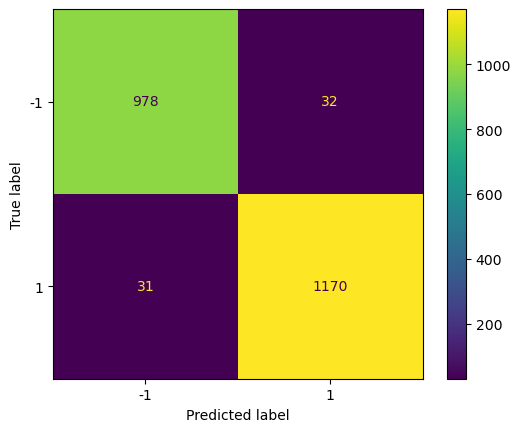

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(catb_model, X_test, y_test)

Overall, the model shows a high number of true positives and true negatives, indicating good performance. 
However, there are a few false negatives and false positives, suggesting some misclassifications. 
It would be beneficial to assess additional metrics like precision, recall, and F1-score to gain a more comprehensive understanding of the model's performance.

- So, to get more comprehensive understanding of the model's performance we need to check ROC, precision, recall, and F1-score.

### 3.3.2. ROC plot:

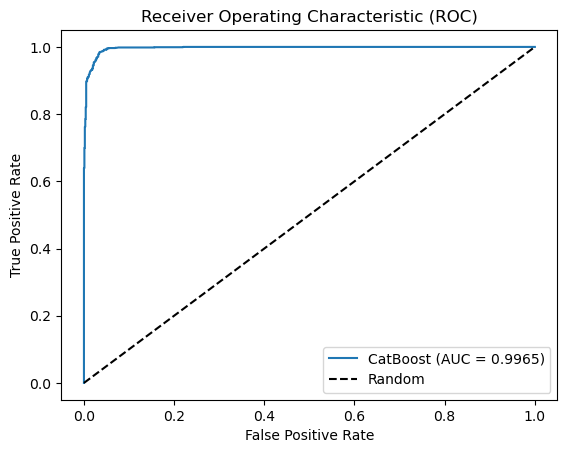

In [167]:
# ROC ploting:

# Predict probabilities for the positive class
y_pred_proba = catb_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

An AUC (Area Under the ROC Curve) of 0.9963 means that the CatBoost classifier is very good at distinguishing between positive and negative instances. 
The ROC curve shows how well the classifier performs at different thresholds, and the AUC summarizes its overall performance. 
In this case, the high AUC value indicates that the classifier has excellent discriminatory power, meaning it can effectively separate the two classes with high accuracy.


### 3.3.3. Classification Report:

In [169]:
# Print classification Report:
print(report)

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97      1010
           1       0.97      0.97      0.97      1201

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



**Conclutions for final model**: 

- The CatBoost classifier showed excellent performance in accurately predicting both classes (-1 and 1), with a precision, recall, and F1-score of 0.97 for each class. The overall accuracy of the model was 97%, indicating its ability to correctly predict the majority of instances.

- The model demonstrated balanced performance across both classes, with a macro average of precision, recall, and F1-score of 0.97. This indicates consistent performance considering the support of each class in the dataset. The weighted average of precision, recall, and F1-score was also 0.97, further confirming the model's consistent performance.

- In conclusion, the CatBoost classifier achieved high accuracy and consistent performance in predicting both classes, demonstrating its effectiveness in classification tasks.

## 3.4. CatBoostClassifier Model + K-fold :

In [170]:
from sklearn.model_selection import KFold

N=15

train_list = []
test_list = []

X_train_fold = []
X_test_fold = []
y_train_fold = []
y_test_fold = []


# stratifiedKfold by department
kfold = KFold(n_splits=N, random_state=42,shuffle=True)

for i, (train_index,test_index) in enumerate(kfold.split(X)):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    X_train_fold.append((X_train))
    X_test_fold.append((X_test))
    y_train_fold.append((y_train))
    y_test_fold.append((y_test))

In [171]:
predictions=[]
full_acc=[]

for  i in range(N):
    model = CatBoostClassifier(iterations = 1900, max_depth= 7, learning_rate= 0.10922249364580958, bootstrap_type = 'MVS',
                              boosting_type = 'Plain', l2_leaf_reg = 1, random_state = 42, verbose=False)

    
    y_train = y_train_fold[i]
    X_train = X_train_fold[i]
    
    y_test = y_test_fold[i]
    X_test = X_test_fold[i]
   
    # fit the model
    model.fit(X_train,y_train,
             early_stopping_rounds=100, 
             eval_set=[(X_test, y_test)]
             )
    
    # evaluate on test data
    pre = model.predict(X_test)
    accuracy = accuracy_score(y_test, pre)
    
    full_acc.append(accuracy)
    
    print(f'Fold {i+1}')
    print('Accuracy on validation data: {:.4f}'.format(accuracy))

print()
print(f'Average Accuracy: {np.mean(full_acc)}')

Fold 1
Accuracy on validation data: 0.9810
Fold 2
Accuracy on validation data: 0.9729
Fold 3
Accuracy on validation data: 0.9647
Fold 4
Accuracy on validation data: 0.9607
Fold 5
Accuracy on validation data: 0.9769
Fold 6
Accuracy on validation data: 0.9878
Fold 7
Accuracy on validation data: 0.9701
Fold 8
Accuracy on validation data: 0.9742
Fold 9
Accuracy on validation data: 0.9715
Fold 10
Accuracy on validation data: 0.9756
Fold 11
Accuracy on validation data: 0.9701
Fold 12
Accuracy on validation data: 0.9824
Fold 13
Accuracy on validation data: 0.9756
Fold 14
Accuracy on validation data: 0.9783
Fold 15
Accuracy on validation data: 0.9634

Average Accuracy: 0.9736770691994572


**Conclution for K-fold**:

- The accuracy score of 0.9715 indicates high accuracy on a specific test set, while the k-fold average accuracy of 0.9737 represents the average accuracy across multiple cross-validation folds. The k-fold average accuracy is slightly higher, suggesting consistent performance across different data subsets. Both scores indicate the model's good performance in predicting the target variable, with the k-fold average accuracy providing a more reliable estimate of its generalization ability.